In [1]:
try:
  from google.colab import drive
  drive.mount('/content/drive')
  drive_path = '/content/drive/My\ Drive/'
except ImportError:
  drive_path = '.'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
from glob import glob
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns

In [3]:
dataset_name = 'cse-cic-ids2018'
dataset_file = f'{dataset_name}.zip'
dataset_path = Path(drive_path, f'datasets/registry.opendata.aws/{dataset_name}')
!pwd
print(dataset_path)

/content
/content/drive/My\ Drive/datasets/registry.opendata.aws/cse-cic-ids2018


Create local directory to store the dataset files of https://www.unb.ca/cic/datasets/ids-2018.html

In [4]:
! if ! test -r $dataset_name; then mkdir $dataset_name && cp $dataset_path/$dataset_file $dataset_name; fi

In [5]:
!ls -al $dataset_name

total 6725288
drwxr-xr-x 2 root root       4096 Nov 10 18:00 .
drwxr-xr-x 1 root root       4096 Nov 10 19:03 ..
-rw------- 1 root root  352368373 Oct 11  2018 Friday-02-03-2018_TrafficForML_CICFlowMeter.csv
-rw------- 1 root root  333723605 Oct 11  2018 Friday-16-02-2018_TrafficForML_CICFlowMeter.csv
-rw------- 1 root root  382840456 Oct 11  2018 Friday-23-02-2018_TrafficForML_CICFlowMeter.csv
-rw-r--r-- 1 root root 4054925350 Oct  1 23:52 Thuesday-20-02-2018_TrafficForML_CICFlowMeter.csv
-rw------- 1 root root  107842858 Oct 11  2018 Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv
-rw------- 1 root root  375945899 Oct 11  2018 Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv
-rw------- 1 root root  382636202 Oct 11  2018 Thursday-22-02-2018_TrafficForML_CICFlowMeter.csv
-rw------- 1 root root  358223333 Oct 11  2018 Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv
-rw------- 1 root root  328893673 Oct 11  2018 Wednesday-21-02-2018_TrafficForML_CICFlowMeter.csv
-rw------- 1 root 

In [6]:
! if test -r $dataset_name/$dataset_file; then cd $dataset_name && unzip $dataset_file && rm -f $dataset_file; fi

In [7]:
!ls -al $dataset_name

total 6725288
drwxr-xr-x 2 root root       4096 Nov 10 18:00 .
drwxr-xr-x 1 root root       4096 Nov 10 19:03 ..
-rw------- 1 root root  352368373 Oct 11  2018 Friday-02-03-2018_TrafficForML_CICFlowMeter.csv
-rw------- 1 root root  333723605 Oct 11  2018 Friday-16-02-2018_TrafficForML_CICFlowMeter.csv
-rw------- 1 root root  382840456 Oct 11  2018 Friday-23-02-2018_TrafficForML_CICFlowMeter.csv
-rw-r--r-- 1 root root 4054925350 Oct  1 23:52 Thuesday-20-02-2018_TrafficForML_CICFlowMeter.csv
-rw------- 1 root root  107842858 Oct 11  2018 Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv
-rw------- 1 root root  375945899 Oct 11  2018 Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv
-rw------- 1 root root  382636202 Oct 11  2018 Thursday-22-02-2018_TrafficForML_CICFlowMeter.csv
-rw------- 1 root root  358223333 Oct 11  2018 Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv
-rw------- 1 root root  328893673 Oct 11  2018 Wednesday-21-02-2018_TrafficForML_CICFlowMeter.csv
-rw------- 1 root 

In [8]:
!ls -alh $dataset_name

total 6.5G
drwxr-xr-x 2 root root 4.0K Nov 10 18:00 .
drwxr-xr-x 1 root root 4.0K Nov 10 19:03 ..
-rw------- 1 root root 337M Oct 11  2018 Friday-02-03-2018_TrafficForML_CICFlowMeter.csv
-rw------- 1 root root 319M Oct 11  2018 Friday-16-02-2018_TrafficForML_CICFlowMeter.csv
-rw------- 1 root root 366M Oct 11  2018 Friday-23-02-2018_TrafficForML_CICFlowMeter.csv
-rw-r--r-- 1 root root 3.8G Oct  1 23:52 Thuesday-20-02-2018_TrafficForML_CICFlowMeter.csv
-rw------- 1 root root 103M Oct 11  2018 Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv
-rw------- 1 root root 359M Oct 11  2018 Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv
-rw------- 1 root root 365M Oct 11  2018 Thursday-22-02-2018_TrafficForML_CICFlowMeter.csv
-rw------- 1 root root 342M Oct 11  2018 Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv
-rw------- 1 root root 314M Oct 11  2018 Wednesday-21-02-2018_TrafficForML_CICFlowMeter.csv
-rw------- 1 root root 200M Oct 11  2018 Wednesday-28-02-2018_TrafficForML_CICFlowMeter

In [9]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         108G   39G   64G  38% /
tmpfs            64M     0   64M   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
shm             5.9G     0  5.9G   0% /dev/shm
tmpfs           6.4G   16K  6.4G   1% /var/colab
/dev/sda1       114G   42G   73G  37% /etc/hosts
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware
drive            15G   15G  474M  97% /content/drive


Perform feature selection separately for every data file

In [52]:
!cp /content/drive/My\ Drive/Colab\ Notebooks/nd00333/nd00333_capstone/clean/clean.py .
!cat clean.py > /dev/null

In [11]:
import importlib
import clean

In [12]:
importlib.reload(clean)

<module 'clean' from '/content/clean.py'>

Summarize one of the smaller data sets.

The following observations can be made:

1. 'Flow Byts/s' and 'Flow Pkts/s' columns contain non-numeric values
2. 'Init Fwd Win Byts' and 'Init Bwd Win Byts' contain a negative number '-1'
3. 'Flow IAT Min' amd 'Fwd IAT Min' contain large absolute negative values

The rows with those values in the respective columns will be removed (1. and 2., note that 2. results in a significant decrease in the number of non-Benign flows for a couple of data sets) or replaced (3.) in the the `get_clean_df` function.

DataFrame cse-cic-ids2018/Friday-02-03-2018_TrafficForML_CICFlowMeter.csv before cleaning


,0,1,2,3,4
Dst Port,443,49684,443,443,443
Protocol,6,6,6,6,6
Timestamp,02/03/2018 08:47:38,02/03/2018 08:47:38,02/03/2018 08:47:40,02/03/2018 08:47:40,02/03/2018 08:47:41
Flow Duration,141385,281,279824,132,274016
Tot Fwd Pkts,9,2,11,2,9
Tot Bwd Pkts,7,1,15,0,13
TotLen Fwd Pkts,553,38,1086,0,1285
TotLen Bwd Pkts,3773,0,10527,0,6141
Fwd Pkt Len Max,202,38,385,0,517
Fwd Pkt Len Min,0,0,0,0,0


,count,mean,std,min,25%,50%,75%,max
Dst Port,1048575.0,8.423429e+03,1.516176e+04,0.000000,80.000000,3389.000000,8.080000e+03,6.553400e+04
Protocol,1048575.0,8.049848e+00,4.432629e+00,0.000000,6.000000,6.000000,6.000000e+00,1.700000e+01
Flow Duration,1048575.0,1.151421e+07,3.012113e+07,0.000000,516.000000,11242.000000,2.210150e+06,1.200000e+08
Tot Fwd Pkts,1048575.0,5.887282e+00,8.903317e+01,1.000000,2.000000,3.000000,7.000000e+00,4.315900e+04
Tot Bwd Pkts,1048575.0,6.983180e+00,2.129580e+02,0.000000,0.000000,1.000000,5.000000e+00,6.924100e+04
TotLen Fwd Pkts,1048575.0,3.920838e+02,2.159779e+03,0.000000,0.000000,63.000000,3.650000e+02,1.100627e+06
TotLen Bwd Pkts,1048575.0,5.271275e+03,3.088768e+05,0.000000,0.000000,129.000000,5.820000e+02,1.010000e+08
Fwd Pkt Len Max,1048575.0,2.104312e+02,2.669497e+02,0.000000,0.000000,46.000000,3.260000e+02,1.711000e+03
Fwd Pkt Len Min,1048575.0,8.249200e+00,2.094972e+01,0.000000,0.000000,0.000000,0.000000e+00,1.460000e+03
Fwd Pkt Len Mean,1048575.0,5.461640e+01,5.762840e+01,0.000000,0.000000,40.000000,1.086667e+02,1.460000e+03


DataFrame cse-cic-ids2018/Friday-02-03-2018_TrafficForML_CICFlowMeter.csv after feature removal, conversion to np.nan and replacing with negative values with 0


,0,1,2,3,4
Flow Duration,141385,281,279824,132,274016
Tot Fwd Pkts,9,2,11,2,9
Tot Bwd Pkts,7,1,15,0,13
TotLen Fwd Pkts,553,38,1086,0,1285
TotLen Bwd Pkts,3773,0,10527,0,6141
Fwd Pkt Len Max,202,38,385,0,517
Fwd Pkt Len Min,0,0,0,0,0
Fwd Pkt Len Mean,61.4444,19,98.7273,0,142.778
Fwd Pkt Len Std,87.5344,26.8701,129.392,0,183.888
Bwd Pkt Len Max,1460,0,1460,0,1460


,count,mean,std,min,25%,50%,75%,max
Flow Duration,1048575.0,1.151421e+07,3.012113e+07,0.000000,516.000000,11242.000000,2.210150e+06,1.200000e+08
Tot Fwd Pkts,1048575.0,5.887282e+00,8.903317e+01,1.000000,2.000000,3.000000,7.000000e+00,4.315900e+04
Tot Bwd Pkts,1048575.0,6.983180e+00,2.129580e+02,0.000000,0.000000,1.000000,5.000000e+00,6.924100e+04
TotLen Fwd Pkts,1048575.0,3.920838e+02,2.159779e+03,0.000000,0.000000,63.000000,3.650000e+02,1.100627e+06
TotLen Bwd Pkts,1048575.0,5.271275e+03,3.088768e+05,0.000000,0.000000,129.000000,5.820000e+02,1.010000e+08
Fwd Pkt Len Max,1048575.0,2.104312e+02,2.669497e+02,0.000000,0.000000,46.000000,3.260000e+02,1.711000e+03
Fwd Pkt Len Min,1048575.0,8.249200e+00,2.094972e+01,0.000000,0.000000,0.000000,0.000000e+00,1.460000e+03
Fwd Pkt Len Mean,1048575.0,5.461640e+01,5.762840e+01,0.000000,0.000000,40.000000,1.086667e+02,1.460000e+03
Fwd Pkt Len Std,1048575.0,7.796052e+01,9.693329e+01,0.000000,0.000000,0.000000,1.882162e+02,1.032376e+03
Bwd Pkt Len Max,1048575.0,3.471215e+02,5.037283e+02,0.000000,0.000000,112.000000,4.880000e+02,1.460000e+03


Converting column ACK Flag Cnt to_numeric
Converting column Active Max to_numeric
Converting column Active Mean to_numeric
Converting column Active Min to_numeric
Converting column Active Std to_numeric
Converting column Bwd Blk Rate Avg to_numeric
Converting column Bwd Byts/b Avg to_numeric
Converting column Bwd Header Len to_numeric
Converting column Bwd IAT Max to_numeric
Converting column Bwd IAT Mean to_numeric
Converting column Bwd IAT Min to_numeric
Converting column Bwd IAT Std to_numeric
Converting column Bwd IAT Tot to_numeric
Converting column Bwd PSH Flags to_numeric
Converting column Bwd Pkt Len Max to_numeric
Converting column Bwd Pkt Len Mean to_numeric
Converting column Bwd Pkt Len Min to_numeric
Converting column Bwd Pkt Len Std to_numeric
Converting column Bwd Pkts/b Avg to_numeric
Converting column Bwd Pkts/s to_numeric
Converting column Bwd Seg Size Avg to_numeric
Converting column Bwd URG Flags to_numeric
Converting column CWE Flag Count to_numeric
Converting colum

,0,1,2,3,4
Flow Duration,141385,281,279824,132,274016
Tot Fwd Pkts,9,2,11,2,9
Tot Bwd Pkts,7,1,15,0,13
TotLen Fwd Pkts,553,38,1086,0,1285
TotLen Bwd Pkts,3773,0,10527,0,6141
Fwd Pkt Len Max,202,38,385,0,517
Fwd Pkt Len Min,0,0,0,0,0
Fwd Pkt Len Mean,61.4444,19,98.7273,0,142.778
Fwd Pkt Len Std,87.5344,26.8701,129.392,0,183.888
Bwd Pkt Len Max,1460,0,1460,0,1460


,count,mean,std,min,25%,50%,75%,max
Flow Duration,1048575.0,1.151421e+07,3.012113e+07,0.000000,516.000000,11242.000000,2.210150e+06,1.200000e+08
Tot Fwd Pkts,1048575.0,5.887282e+00,8.903317e+01,1.000000,2.000000,3.000000,7.000000e+00,4.315900e+04
Tot Bwd Pkts,1048575.0,6.983180e+00,2.129580e+02,0.000000,0.000000,1.000000,5.000000e+00,6.924100e+04
TotLen Fwd Pkts,1048575.0,3.920838e+02,2.159779e+03,0.000000,0.000000,63.000000,3.650000e+02,1.100627e+06
TotLen Bwd Pkts,1048575.0,5.271275e+03,3.088768e+05,0.000000,0.000000,129.000000,5.820000e+02,1.010000e+08
Fwd Pkt Len Max,1048575.0,2.104312e+02,2.669497e+02,0.000000,0.000000,46.000000,3.260000e+02,1.711000e+03
Fwd Pkt Len Min,1048575.0,8.249200e+00,2.094972e+01,0.000000,0.000000,0.000000,0.000000e+00,1.460000e+03
Fwd Pkt Len Mean,1048575.0,5.461640e+01,5.762840e+01,0.000000,0.000000,40.000000,1.086667e+02,1.460000e+03
Fwd Pkt Len Std,1048575.0,7.796052e+01,9.693329e+01,0.000000,0.000000,0.000000,1.882162e+02,1.032376e+03
Bwd Pkt Len Max,1048575.0,3.471215e+02,5.037283e+02,0.000000,0.000000,112.000000,4.880000e+02,1.460000e+03


DataFrame cse-cic-ids2018/Friday-02-03-2018_TrafficForML_CICFlowMeter.csv missing values before their removal


,count,mean,std,min,25%,50%,75%,max
Flow Duration,514380.0,1.007919e+07,2.758430e+07,0.000000,400.000000,572.000000,22995.000000,1.199999e+08
Tot Fwd Pkts,514380.0,2.185746e+00,1.827559e+01,1.000000,1.000000,2.000000,2.000000,9.263000e+03
Tot Bwd Pkts,514380.0,6.505580e-01,3.102864e+01,0.000000,0.000000,0.000000,1.000000,1.669300e+04
TotLen Fwd Pkts,514380.0,3.204083e+01,8.130256e+02,0.000000,0.000000,0.000000,42.000000,1.578280e+05
TotLen Bwd Pkts,514380.0,2.055135e+02,3.618733e+04,0.000000,0.000000,0.000000,82.000000,1.990000e+07
Fwd Pkt Len Max,514380.0,1.889680e+01,2.955519e+01,0.000000,0.000000,0.000000,38.000000,1.460000e+03
Fwd Pkt Len Min,514380.0,1.652724e+01,2.495619e+01,0.000000,0.000000,0.000000,36.000000,1.232000e+03
Fwd Pkt Len Mean,514380.0,1.761791e+01,2.521308e+01,0.000000,0.000000,0.000000,37.000000,1.232000e+03
Fwd Pkt Len Std,514380.0,1.221525e+00,8.009432e+00,0.000000,0.000000,0.000000,0.000000,7.501328e+02
Bwd Pkt Len Max,514380.0,4.003063e+01,6.336373e+01,0.000000,0.000000,0.000000,72.000000,1.232000e+03


DataFrame cse-cic-ids2018/Friday-02-03-2018_TrafficForML_CICFlowMeter.csv before missing values removal, shape (1048575, 77)


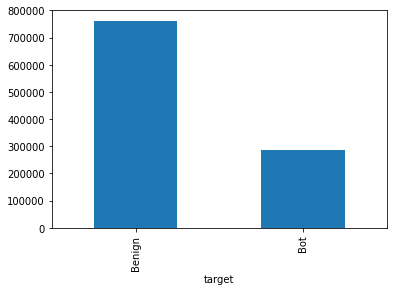

,target,count
0,Benign,762384
1,Bot,286191


0    0.727067
1    0.272933
dtype: float64

DataFrame cse-cic-ids2018/Friday-02-03-2018_TrafficForML_CICFlowMeter.csv only missing values, shape (514380, 77)


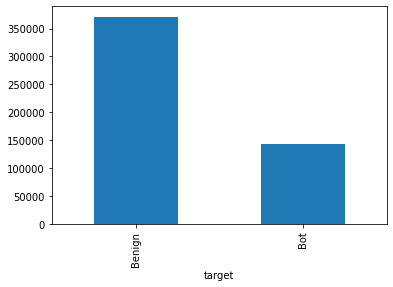

,target,count
0,Benign,371203
1,Bot,143177


0    0.721651
1    0.278349
dtype: float64

Converting column ACK Flag Cnt round(0).astype(int)
Converting column Active Max round(0).astype(int)
Converting column Active Mean round(0).astype(int)
Converting column Active Min round(0).astype(int)
Converting column Active Std round(0).astype(int)
Converting column Bwd Blk Rate Avg round(0).astype(int)
Converting column Bwd Byts/b Avg round(0).astype(int)
Converting column Bwd Header Len round(0).astype(int)
Converting column Bwd IAT Max round(0).astype(int)
Converting column Bwd IAT Mean round(0).astype(int)
Converting column Bwd IAT Min round(0).astype(int)
Converting column Bwd IAT Std round(0).astype(int)
Converting column Bwd IAT Tot round(0).astype(int)
Converting column Bwd PSH Flags round(0).astype(int)
Converting column Bwd Pkt Len Max round(0).astype(int)
Converting column Bwd Pkt Len Mean round(0).astype(int)
Converting column Bwd Pkt Len Min round(0).astype(int)
Converting column Bwd Pkt Len Std round(0).astype(int)
Converting column Bwd Pkts/b Avg round(0).astype(int)

,0,1,2,4,6
Flow Duration,141385,281,279824,274016,5964033
Tot Fwd Pkts,9,2,11,9,3
Tot Bwd Pkts,7,1,15,13,1
TotLen Fwd Pkts,553,38,1086,1285,0
TotLen Bwd Pkts,3773,0,10527,6141,0
Fwd Pkt Len Max,202,38,385,517,0
Fwd Pkt Len Min,0,0,0,0,0
Fwd Pkt Len Mean,61,19,99,143,0
Fwd Pkt Len Std,88,27,129,184,0
Bwd Pkt Len Max,1460,0,1460,1460,0


,count,mean,std,min,25%,50%,75%,max
Flow Duration,533975.0,1.290131e+07,3.232201e+07,1.0,10910.0,1271166.0,3959368.0,119999997.0
Tot Fwd Pkts,533975.0,9.454999e+00,1.233634e+02,1.0,3.0,6.0,9.0,43159.0
Tot Bwd Pkts,533975.0,1.308587e+01,2.967379e+02,1.0,4.0,5.0,7.0,69241.0
TotLen Fwd Pkts,533975.0,7.390618e+02,2.877147e+03,0.0,326.0,364.0,1144.0,1100627.0
TotLen Bwd Pkts,533975.0,1.015331e+04,4.313215e+05,0.0,129.0,488.0,1581.0,101000000.0
Fwd Pkt Len Max,533975.0,3.950094e+02,2.639620e+02,0.0,161.0,326.0,661.0,1711.0
Fwd Pkt Len Min,533975.0,2.641903e-01,1.148109e+01,0.0,0.0,0.0,0.0,1460.0
Fwd Pkt Len Mean,533975.0,9.037567e+01,5.766305e+01,0.0,52.0,109.0,120.0,1460.0
Fwd Pkt Len Std,533975.0,1.518660e+02,8.513680e+01,0.0,83.0,188.0,210.0,1032.0
Bwd Pkt Len Max,533975.0,6.430848e+02,5.620702e+02,0.0,112.0,460.0,1173.0,1460.0


DataFrame cse-cic-ids2018/Friday-02-03-2018_TrafficForML_CICFlowMeter.csv only missing values, shape (514380, 77)


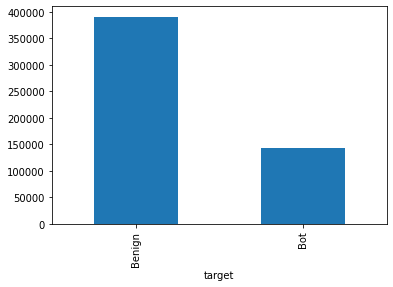

,target,count
0,Benign,390961
1,Bot,143014


0    0.732171
1    0.267829
dtype: float64

targets {'Benign': 0, 'Bot': 1}
Initial DataFrame target
Final DataFrame target
Initial X_train.shape, X_test.shape (186891, 76), (80097, 76)
quasi_constant_feat ['Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Pkt Len Min', 'CWE Flag Count', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg']
After quasi_constant_feat removal X_train.shape, X_test.shape (186891, 65), (80097, 65)
0
10
20
30
40
50
60
duplicated_feat ['Subflow Fwd Pkts', 'Subflow Bwd Pkts', 'Subflow Fwd Byts', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'SYN Flag Cnt', 'ECE Flag Cnt']
After duplicated_feat removal X_train.shape, X_test.shape (186891, 58), (80097, 58)
Test performance metrics=0.999953
Test performance clasification report
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000     58793
           1     1.0000    0.9999    1.0000     21304

    accuracy                         1.0000     80097
   macro 

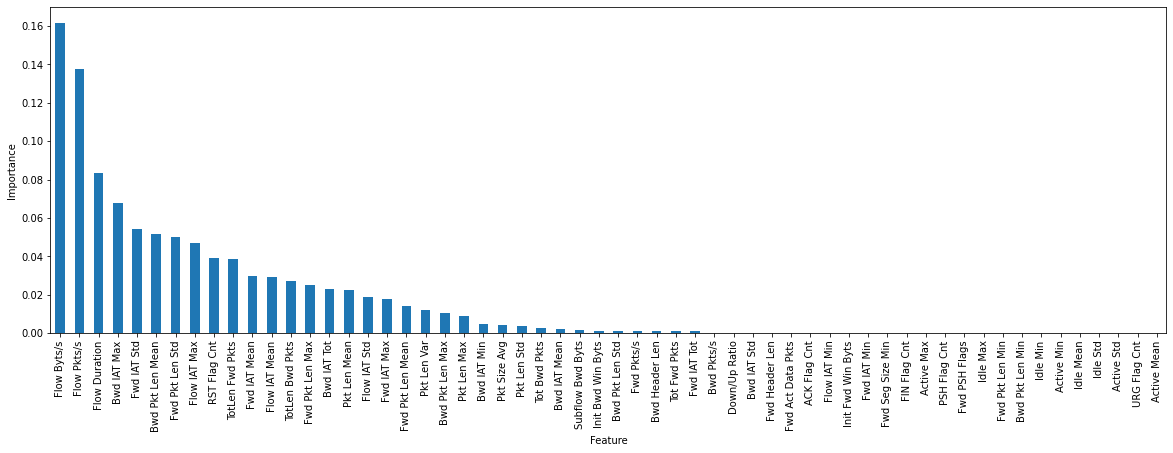

features importance list ['Flow Byts/s', 'Flow Pkts/s', 'Flow Duration', 'Bwd IAT Max', 'Fwd IAT Std', 'Bwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Flow IAT Max', 'RST Flag Cnt', 'TotLen Fwd Pkts', 'Fwd IAT Mean', 'Flow IAT Mean', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Bwd IAT Tot', 'Pkt Len Mean', 'Flow IAT Std', 'Fwd IAT Max', 'Fwd Pkt Len Mean', 'Pkt Len Var', 'Bwd Pkt Len Max', 'Pkt Len Max', 'Bwd IAT Min', 'Pkt Size Avg', 'Pkt Len Std', 'Tot Bwd Pkts', 'Bwd IAT Mean', 'Subflow Bwd Byts', 'Init Bwd Win Byts', 'Bwd Pkt Len Std', 'Fwd Pkts/s', 'Bwd Header Len', 'Tot Fwd Pkts', 'Fwd IAT Tot', 'Bwd Pkts/s', 'Down/Up Ratio', 'Bwd IAT Std', 'Fwd Header Len', 'Fwd Act Data Pkts', 'ACK Flag Cnt', 'Flow IAT Min', 'Init Fwd Win Byts', 'Fwd IAT Min', 'Fwd Seg Size Min', 'FIN Flag Cnt', 'Active Max', 'PSH Flag Cnt', 'Fwd PSH Flags', 'Idle Max', 'Fwd Pkt Len Min', 'Bwd Pkt Len Min', 'Idle Min', 'Active Min', 'Idle Mean', 'Idle Std', 'Active Std', 'URG Flag Cnt', 'Active Mean']
Test one feature perfo

In [13]:
df = clean.get_clean_df(f'{dataset_name}/Friday-02-03-2018_TrafficForML_CICFlowMeter.csv', verbose=True)
feature_list = clean.get_feature_list(df, tolerance=0.0001, sample_fraction=0.5)
print(feature_list)
del df

A 12 GB machine is unable to keep copies of the largest dataset `Thuesday-20-02-2018_TrafficForML_CICFlowMeter.csv` in memory. Therefore some of the low variance and duplicate features found in smaller datasets are removed upfront from the lagest dataset to reduce its size. Moreover the lagest data file contains `extra_features` not present in other data files, and they are therefore removed. Moreover due to a large number (almost 8 millions) samples if the largest data set a sample of 5% is used in the process of feature selection.

Many people (e.g. Frank Harrell https://twitter.com/f2harrell/status/1137012097391312897?lang=en `Feature selection doesn't work in general because it can't find the right variables and distorts statistical properties.  One summary of the evils of stepwise`) claim that no feature selection should be performed. In this case reducing the number of features is necessary due to limited computing resources.

In principle a feature selection should happen on an isolated subset of the data, in order to not involve the test data in any model choices. This approach is not followed strictly here, since another separate test set https://www.unb.ca/cic/datasets/ids-2017.html is used for the final estimation of the model performance.

The features are selected in `get_feature_list` using an addition process, where features are added on-by-one in the order of importance, only if by adding a feature the performance metrics (the macro average of recall across all target classes) increases by a threshold.

In [14]:
columns = []
for dataset_file in sorted(glob(f'{dataset_name}/*.csv')):
  columns_dataset_file = pd.read_csv(f'{dataset_file}', index_col=0, nrows=0).columns.tolist()
  columns_new = set(columns_dataset_file) - set(columns)
  if len(columns_new):
    print(f'New columns in {dataset_file}', columns_new)
    columns.extend(columns_new)

New columns in cse-cic-ids2018/Friday-02-03-2018_TrafficForML_CICFlowMeter.csv {'Bwd IAT Std', 'Fwd Pkt Len Std', 'Protocol', 'FIN Flag Cnt', 'Active Mean', 'CWE Flag Count', 'Bwd Pkt Len Std', 'Bwd Pkts/s', 'Fwd Byts/b Avg', 'Bwd IAT Max', 'Bwd Byts/b Avg', 'Subflow Fwd Pkts', 'Bwd Seg Size Avg', 'Fwd PSH Flags', 'Pkt Len Min', 'Idle Min', 'RST Flag Cnt', 'Bwd IAT Tot', 'Flow Pkts/s', 'Pkt Len Var', 'Bwd Pkt Len Max', 'ECE Flag Cnt', 'URG Flag Cnt', 'Active Max', 'Flow IAT Mean', 'Bwd Pkt Len Min', 'Fwd Act Data Pkts', 'Idle Mean', 'Fwd IAT Tot', 'TotLen Fwd Pkts', 'Down/Up Ratio', 'PSH Flag Cnt', 'Fwd Seg Size Avg', 'Fwd IAT Max', 'TotLen Bwd Pkts', 'Bwd URG Flags', 'Active Std', 'Pkt Len Mean', 'Fwd Pkts/b Avg', 'Fwd Pkts/s', 'Flow Byts/s', 'Pkt Len Std', 'Init Bwd Win Byts', 'Bwd PSH Flags', 'Pkt Len Max', 'Bwd IAT Mean', 'Fwd IAT Min', 'SYN Flag Cnt', 'Tot Fwd Pkts', 'Fwd URG Flags', 'Label', 'Bwd Blk Rate Avg', 'Init Fwd Win Byts', 'Flow Duration', 'Subflow Bwd Byts', 'Idle Std',

In [15]:
quasi_constant_features = ['Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'CWE Flag Count', 'Fwd Byts/b Avg',
                           'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg']
duplicated_features = ['Subflow Fwd Pkts', 'Subflow Bwd Pkts', 'Subflow Fwd Byts', 'Subflow Bwd Byts', 'Fwd Seg Size Avg',
                       'Bwd Seg Size Avg', 'SYN Flag Cnt', 'ECE Flag Cnt']
extra_features = ['Src IP', 'Src Port', 'Dst Port', 'Dst IP']

In [16]:
selected_features = {}
for dataset_file in sorted(glob(f'{dataset_name}/*.csv')):
  if dataset_file == f'{dataset_name}/Thuesday-20-02-2018_TrafficForML_CICFlowMeter.csv':
    columns_to_remove = quasi_constant_features + duplicated_features + extra_features
    sample_fraction = 0.05
  else:
    columns_to_remove = extra_features
    sample_fraction = 0.5
  columns = pd.read_csv(dataset_file, index_col=0, nrows=0).columns.tolist()
  usecols = []
  for column in columns:
    if column not in columns_to_remove:
      usecols.append(column)    
  df = clean.get_clean_df(dataset_file, usecols=usecols, verbose=True)
  feature_list = clean.get_feature_list(df, tolerance=0.001, sample_fraction=sample_fraction)
  del df
  selected_features[dataset_file] = feature_list

Output hidden; open in https://colab.research.google.com to view.

Find the union set of selected features across all data files

In [17]:
selected_features_common = []
for dataset_file, features_list in sorted(selected_features.items()):
  print(f'Merging features for {dataset_file}', features_list)
  for feature in features_list:
    if feature not in selected_features_common:
      selected_features_common.append(feature)

Merging features for cse-cic-ids2018/Friday-02-03-2018_TrafficForML_CICFlowMeter.csv ['Flow Byts/s', 'Flow Pkts/s', 'Flow Duration']
Merging features for cse-cic-ids2018/Friday-16-02-2018_TrafficForML_CICFlowMeter.csv ['Fwd Pkt Len Std', 'Bwd IAT Min', 'PSH Flag Cnt']
Merging features for cse-cic-ids2018/Friday-23-02-2018_TrafficForML_CICFlowMeter.csv ['RST Flag Cnt', 'Bwd Pkt Len Max', 'Pkt Len Std']
Merging features for cse-cic-ids2018/Thuesday-20-02-2018_TrafficForML_CICFlowMeter.csv ['TotLen Fwd Pkts']
Merging features for cse-cic-ids2018/Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv ['Fwd Seg Size Min', 'Init Fwd Win Byts', 'Pkt Len Max', 'Bwd Header Len', 'Init Bwd Win Byts', 'ECE Flag Cnt']
Merging features for cse-cic-ids2018/Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv ['Fwd Seg Size Min', 'Init Fwd Win Byts', 'Bwd Header Len', 'TotLen Bwd Pkts']
Merging features for cse-cic-ids2018/Thursday-22-02-2018_TrafficForML_CICFlowMeter.csv ['Bwd Pkt Len Max', 'Pkt Len Max', '

In [18]:
print(f'Number of selected features {len(selected_features_common)}')
for feature in selected_features_common:
  print(feature)

Number of selected features 19
Flow Byts/s
Flow Pkts/s
Flow Duration
Fwd Pkt Len Std
Bwd IAT Min
PSH Flag Cnt
RST Flag Cnt
Bwd Pkt Len Max
Pkt Len Std
TotLen Fwd Pkts
Fwd Seg Size Min
Init Fwd Win Byts
Pkt Len Max
Bwd Header Len
Init Bwd Win Byts
ECE Flag Cnt
TotLen Bwd Pkts
Bwd Pkt Len Std
Flow IAT Max


Save selected features data into new csv files

In [19]:
dataset_name_clean = dataset_name + '-clean'

In [20]:
!mkdir -p $dataset_name_clean

In [21]:
for dataset_file in sorted(glob(f'{dataset_name}/*.csv')):
  file_name = dataset_file.split('/')[-1]
  df = clean.get_clean_df(dataset_file, usecols=selected_features_common + ['Label'], verbose=False)
  df.to_csv(f'{dataset_name_clean}/{file_name}', index=False)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (3,6,7,11,12,15,16,17,20,31,37,41,43,47,48,52,67,68,70) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (3,6,7,11,12,15,16,17,20,31,37,41,43,47,48,52,67,68,70) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (3,6,7,11,12,15,16,17,20,31,37,41,43,47,48,52,67,68,70) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [23]:
!ls -al $dataset_name_clean

total 640548
drwxr-xr-x 2 root root      4096 Nov 10 19:14 .
drwxr-xr-x 1 root root      4096 Nov 10 19:03 ..
-rw-r--r-- 1 root root  43375774 Nov 10 21:39 Friday-02-03-2018_TrafficForML_CICFlowMeter.csv
-rw-r--r-- 1 root root  49622257 Nov 10 21:39 Friday-16-02-2018_TrafficForML_CICFlowMeter.csv
-rw-r--r-- 1 root root  38558812 Nov 10 21:39 Friday-23-02-2018_TrafficForML_CICFlowMeter.csv
-rw-r--r-- 1 root root 306445923 Nov 10 21:41 Thuesday-20-02-2018_TrafficForML_CICFlowMeter.csv
-rw-r--r-- 1 root root  14774622 Nov 10 21:41 Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv
-rw-r--r-- 1 root root  37085529 Nov 10 21:41 Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv
-rw-r--r-- 1 root root  38162421 Nov 10 21:41 Thursday-22-02-2018_TrafficForML_CICFlowMeter.csv
-rw-r--r-- 1 root root  53203305 Nov 10 21:42 Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv
-rw-r--r-- 1 root root  45629845 Nov 10 21:42 Wednesday-21-02-2018_TrafficForML_CICFlowMeter.csv
-rw-r--r-- 1 root root  290215

In [24]:
!ls -alh $dataset_name_clean

total 626M
drwxr-xr-x 2 root root 4.0K Nov 10 19:14 .
drwxr-xr-x 1 root root 4.0K Nov 10 19:03 ..
-rw-r--r-- 1 root root  42M Nov 10 21:39 Friday-02-03-2018_TrafficForML_CICFlowMeter.csv
-rw-r--r-- 1 root root  48M Nov 10 21:39 Friday-16-02-2018_TrafficForML_CICFlowMeter.csv
-rw-r--r-- 1 root root  37M Nov 10 21:39 Friday-23-02-2018_TrafficForML_CICFlowMeter.csv
-rw-r--r-- 1 root root 293M Nov 10 21:41 Thuesday-20-02-2018_TrafficForML_CICFlowMeter.csv
-rw-r--r-- 1 root root  15M Nov 10 21:41 Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv
-rw-r--r-- 1 root root  36M Nov 10 21:41 Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv
-rw-r--r-- 1 root root  37M Nov 10 21:41 Thursday-22-02-2018_TrafficForML_CICFlowMeter.csv
-rw-r--r-- 1 root root  51M Nov 10 21:42 Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv
-rw-r--r-- 1 root root  44M Nov 10 21:42 Wednesday-21-02-2018_TrafficForML_CICFlowMeter.csv
-rw-r--r-- 1 root root  28M Nov 10 21:42 Wednesday-28-02-2018_TrafficForML_CICFlowMeter

In [25]:
!head -2 $dataset_name_clean/*.csv

==> cse-cic-ids2018-clean/Friday-02-03-2018_TrafficForML_CICFlowMeter.csv <==
Flow Duration,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Max,Bwd IAT Min,Bwd Header Len,Pkt Len Max,Pkt Len Std,RST Flag Cnt,PSH Flag Cnt,ECE Flag Cnt,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,target
141385,553,3773,88,1460,655,30597,113,73403,1,152,1460,475,1,1,1,8192,119,20,Benign

==> cse-cic-ids2018-clean/Friday-16-02-2018_TrafficForML_CICFlowMeter.csv <==
Flow Duration,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Max,Bwd IAT Min,Bwd Header Len,Pkt Len Max,Pkt Len Std,RST Flag Cnt,PSH Flag Cnt,ECE Flag Cnt,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,target
20784143,2416,1344,55,64,32,181,3,9058214,41601,880,240,54,0,0,0,263,255,20,Benign

==> cse-cic-ids2018-clean/Friday-23-02-2018_TrafficForML_CICFlowMeter.csv <==
Flow Duration,TotLen Fwd Pkts,TotLe

Load all data files into a common dataframe

In [26]:
df = pd.concat(map(pd.read_csv, glob(f'{dataset_name_clean}/*.csv')))

In [27]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df.head().transpose())
    display(df.describe().transpose())

,0,1,2,3,4
Flow Duration,37366762,179213,25524814,17167199,5234448
TotLen Fwd Pkts,2168,182,1280,4560,137
TotLen Bwd Pkts,2993,935,2273,1728,442
Fwd Pkt Len Std,255,105,177,27,61
Bwd Pkt Len Max,976,935,976,64,442
Bwd Pkt Len Std,396,468,348,32,255
Flow Byts/s,138,6233,139,366,111
Flow Pkts/s,1,39,1,7,2
Flow IAT Max,15617415,177147,17163940,4026535,4543857
Bwd IAT Min,893,458,82,1,342


,count,mean,std,min,25%,50%,75%,max
Flow Duration,8104760.0,1.648459e+07,3.586444e+07,1.0,5752.00,1520069.5,5118814.00,120000000.0
TotLen Fwd Pkts,8104760.0,7.316584e+02,1.345382e+04,0.0,31.00,455.0,1128.00,13486697.0
TotLen Bwd Pkts,8104760.0,9.388480e+03,3.312801e+05,0.0,96.00,582.0,1581.00,156360426.0
Fwd Pkt Len Std,8104760.0,1.404127e+02,1.319521e+02,0.0,18.00,105.0,218.00,18402.0
Bwd Pkt Len Max,8104760.0,6.501931e+02,5.585224e+02,0.0,76.00,488.0,1173.00,65160.0
Bwd Pkt Len Std,8104760.0,2.634154e+02,2.209558e+02,0.0,0.00,241.0,430.00,22448.0
Flow Byts/s,8104760.0,1.444096e+05,2.308201e+06,0.0,39.00,666.0,1933.00,916078431.0
Flow Pkts/s,8104760.0,6.110577e+04,2.561591e+05,0.0,2.00,9.0,1061.00,3000000.0
Flow IAT Max,8104760.0,6.092391e+06,1.492364e+07,1.0,5065.75,951651.0,4286852.00,120000000.0
Bwd IAT Min,8104760.0,4.975059e+05,4.952165e+06,0.0,0.00,29.0,55230.25,120000000.0


In [30]:
size = df.groupby(['target']).size().reset_index(name='count')
display(size)

,target,count
0,Benign,6828209
1,Bot,143014
2,Brute Force -Web,270
3,Brute Force -XSS,113
4,DDOS attack-HOIC,163750
5,DDoS attacks-LOIC-HTTP,289289
6,DoS attacks-GoldenEye,27772
7,DoS attacks-Hulk,25812
8,DoS attacks-SlowHTTPTest,139890
9,DoS attacks-Slowloris,8632


In [32]:
size['fraction'] = df.groupby(['target']).size().reset_index(name='count').apply(lambda x: x['count'] / df.shape[0], axis=1)
display(size)

,target,count,fraction
0,Benign,6828209,0.842494
1,Bot,143014,0.017646
2,Brute Force -Web,270,0.000033
3,Brute Force -XSS,113,0.000014
4,DDOS attack-HOIC,163750,0.020204
5,DDoS attacks-LOIC-HTTP,289289,0.035694
6,DoS attacks-GoldenEye,27772,0.003427
7,DoS attacks-Hulk,25812,0.003185
8,DoS attacks-SlowHTTPTest,139890,0.017260
9,DoS attacks-Slowloris,8632,0.001065


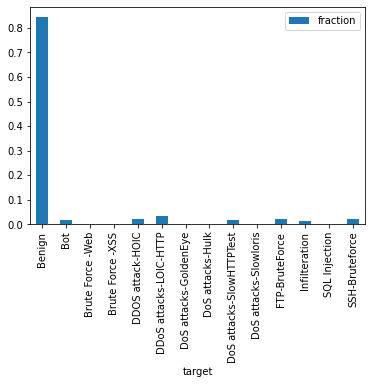

In [36]:
size.plot.bar(x='target', y='fraction')

Explore correlations between features. In can be noted that there are groups of features close to correlated:

1. 'TotLen Bwd Pkts' and 'Bwd Header Len'
2. 'Bwd Pkt Len Std', 'Bwd Pkt Len Max', 'Pkt Len Std' and 'Pkt Len Max'
3. 'RST Flag Cnt' and 'ECE Flag Cnt'

These correlations, for the non-Benign labels are explored in more details further below, and since the correlation coefficient does not represent a linear relationship, all the above features are kept.

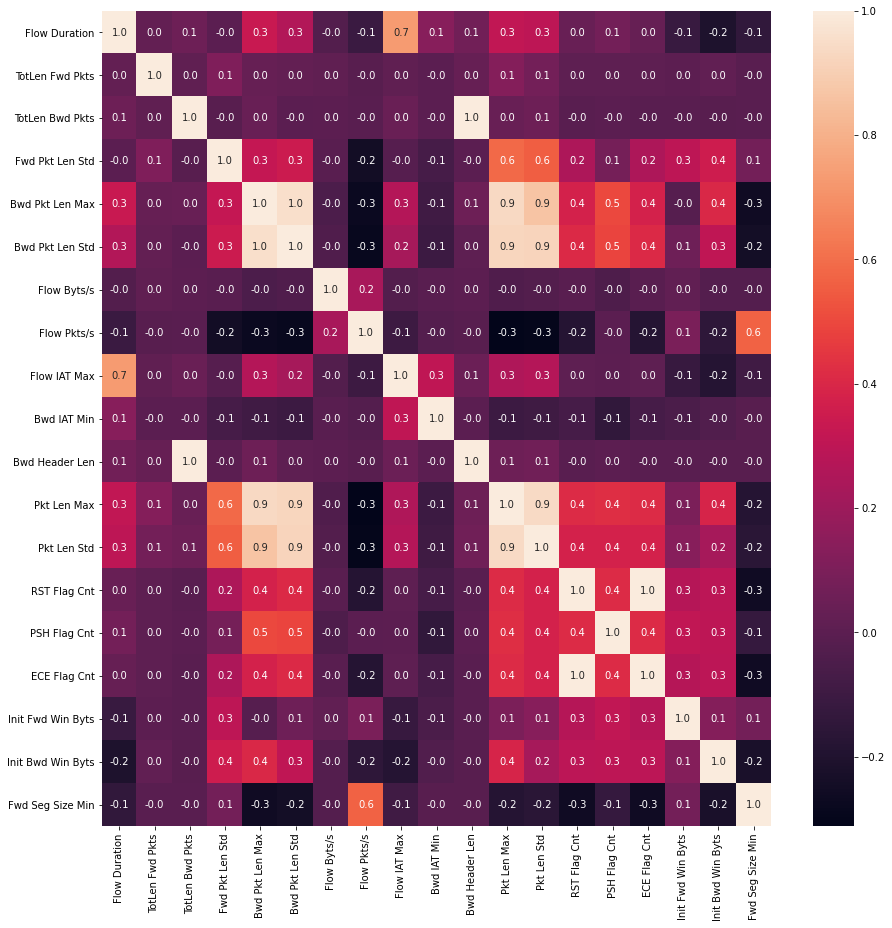

In [37]:
df_corr = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df_corr, xticklabels=df_corr.columns, yticklabels=df_corr.columns, annot=True, fmt='.1f', ax=ax)

In [38]:
def plot_corr(data, x, y, xlim, ylim):
  import matplotlib.pyplot as plt
  fig, ax = plt.subplots(figsize=(15, 15))
  data.plot.scatter(x=x, y=y, ax=ax)
  ax.set_xlim(xlim)
  ax.set_ylim(ylim)

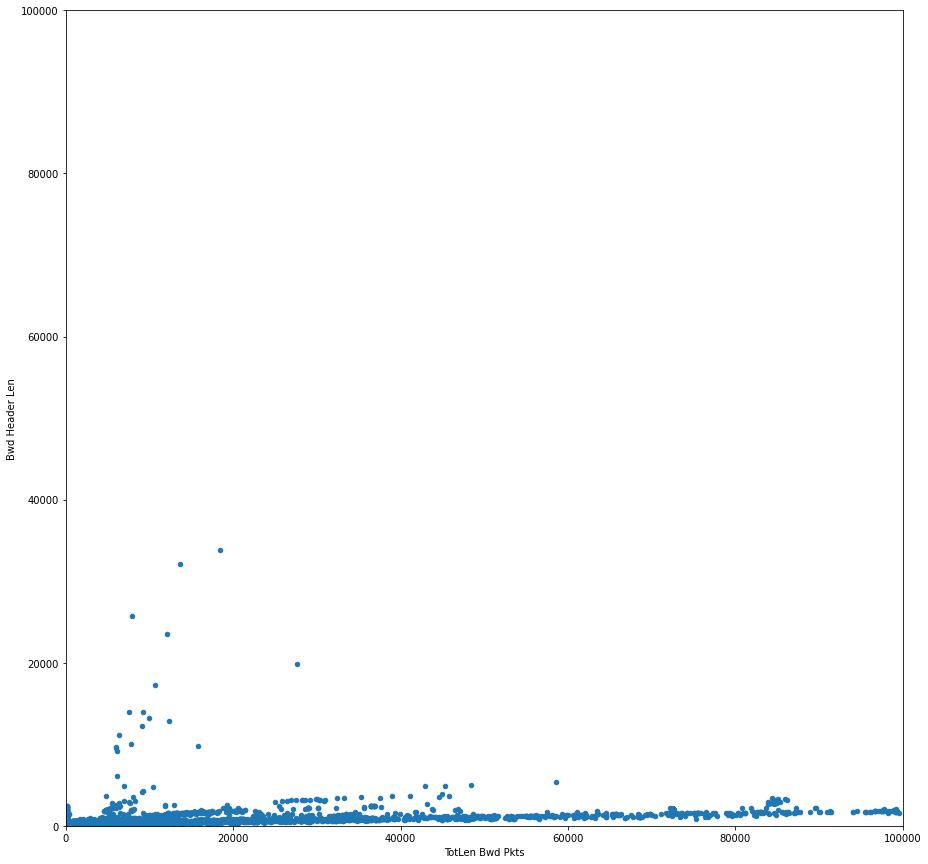

In [39]:
plot_corr(df[df['target'] != 'Benign'], 'TotLen Bwd Pkts', 'Bwd Header Len', xlim=(-1, 1e5), ylim=(-1, 1e5))

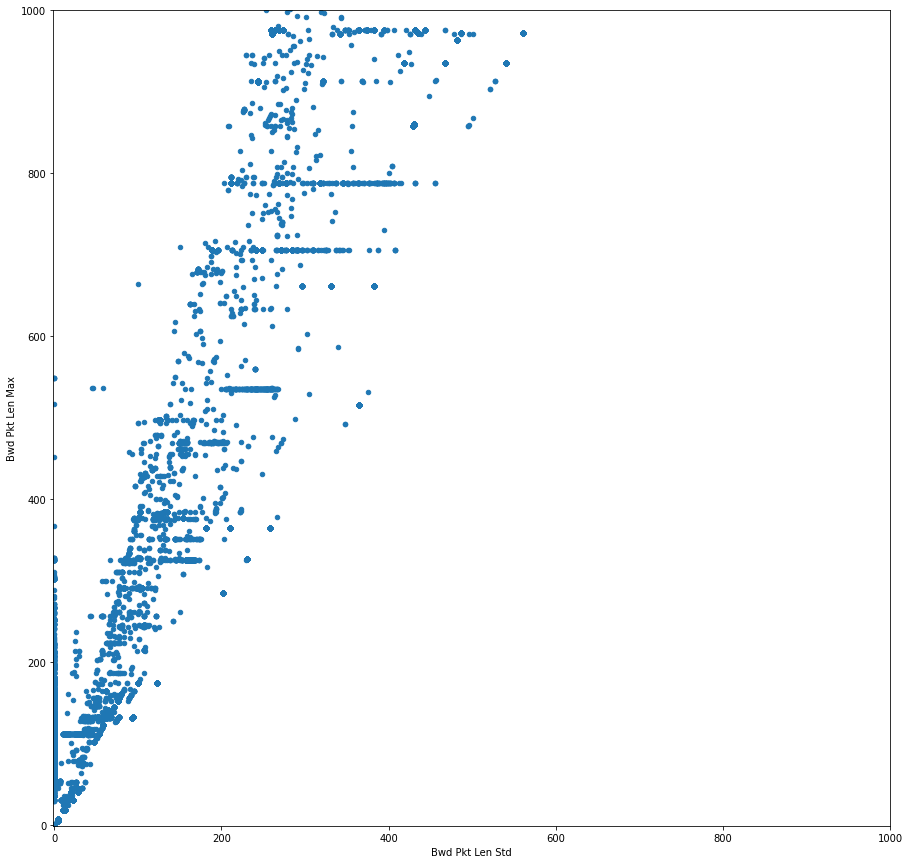

In [40]:
plot_corr(df[df['target'] != 'Benign'], 'Bwd Pkt Len Std', 'Bwd Pkt Len Max', xlim=(-1, 1e3), ylim=(-1, 1e3))

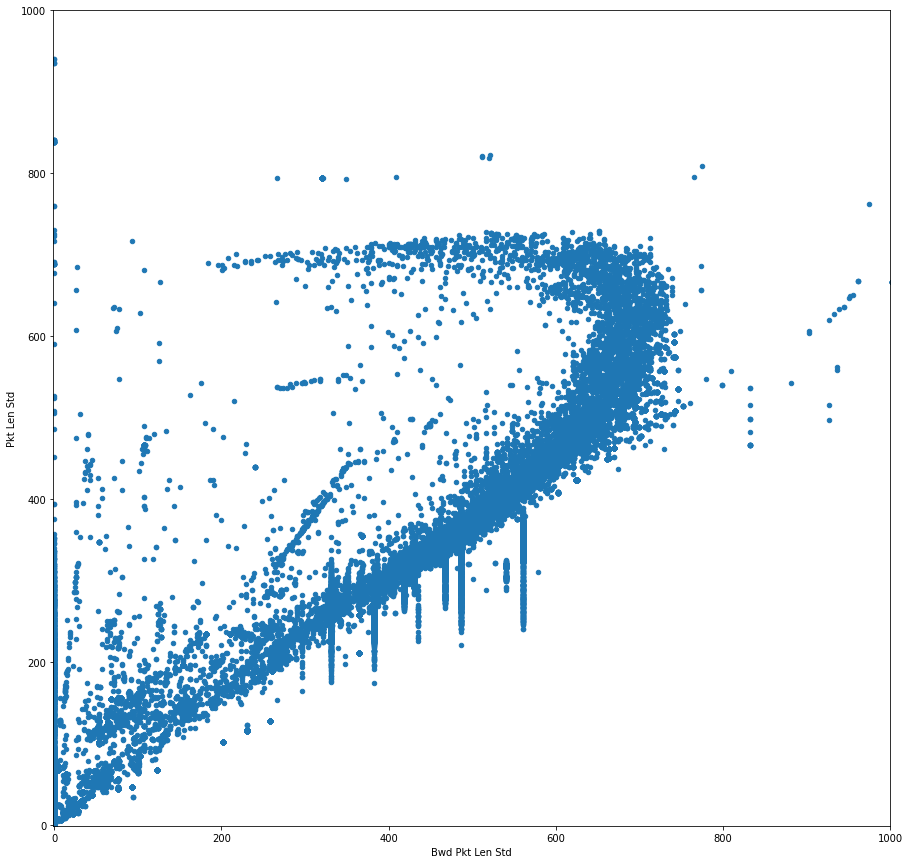

In [41]:
plot_corr(df[df['target'] != 'Benign'], 'Bwd Pkt Len Std', 'Pkt Len Std', xlim=(-1, 1e3), ylim=(-1, 1e3))

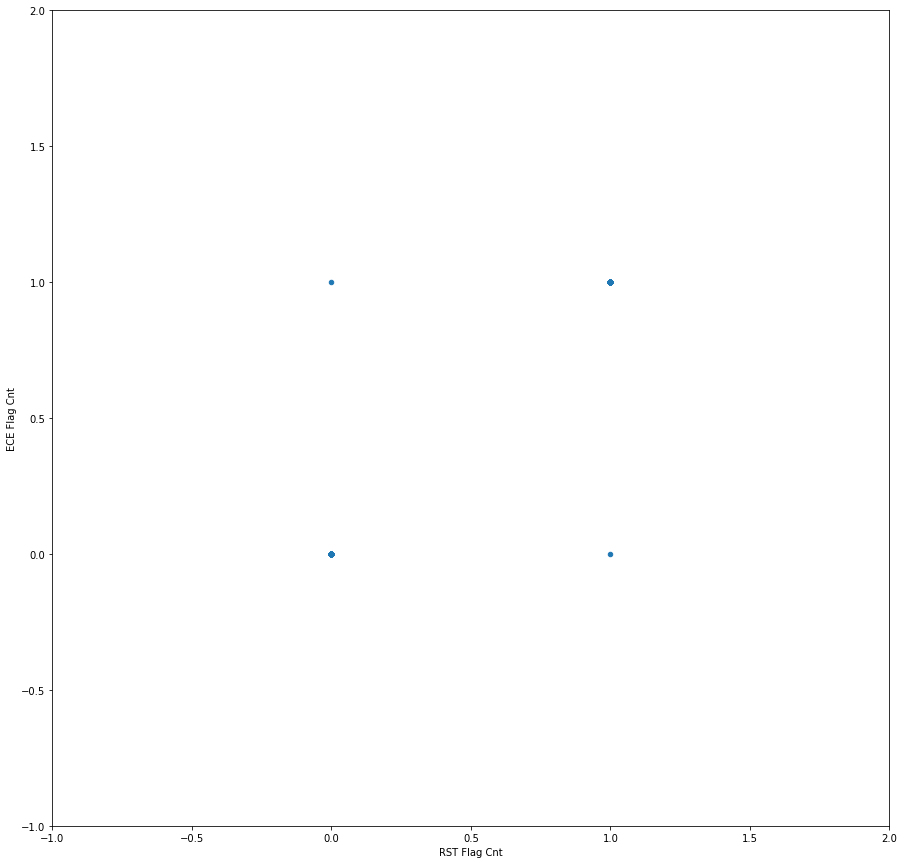

In [42]:
plot_corr(df[df['target'] != 'Benign'], 'RST Flag Cnt', 'ECE Flag Cnt', xlim=(-1, 2), ylim=(-1, 2))

Save the clean dataset archive

In [46]:
dataset_clean_file = f'{dataset_name_clean}.zip'

In [44]:
!rm -f $dataset_clean_file
!zip -r $dataset_clean_file $dataset_name_clean

  adding: cse-cic-ids2018-clean/ (stored 0%)
  adding: cse-cic-ids2018-clean/Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv (deflated 76%)
  adding: cse-cic-ids2018-clean/Wednesday-21-02-2018_TrafficForML_CICFlowMeter.csv (deflated 82%)
  adding: cse-cic-ids2018-clean/Thursday-22-02-2018_TrafficForML_CICFlowMeter.csv (deflated 76%)
  adding: cse-cic-ids2018-clean/Friday-02-03-2018_TrafficForML_CICFlowMeter.csv (deflated 79%)
  adding: cse-cic-ids2018-clean/Wednesday-28-02-2018_TrafficForML_CICFlowMeter.csv (deflated 77%)
  adding: cse-cic-ids2018-clean/Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv (deflated 85%)
  adding: cse-cic-ids2018-clean/Thuesday-20-02-2018_TrafficForML_CICFlowMeter.csv (deflated 77%)
  adding: cse-cic-ids2018-clean/Friday-23-02-2018_TrafficForML_CICFlowMeter.csv (deflated 76%)
  adding: cse-cic-ids2018-clean/Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv (deflated 79%)
  adding: cse-cic-ids2018-clean/Friday-16-02-2018_TrafficForML_CICFlowMeter.csv (de

In [45]:
! /bin/cp -f $dataset_clean_file $dataset_path

In [49]:
!jupyter nbconvert --to html '/content/drive/My Drive/Colab Notebooks/nd00333/clean.ipynb'

[NbConvertApp] Converting notebook /content/drive/My Drive/Colab Notebooks/nd00333/clean.ipynb to html
[NbConvertApp] Writing 1056783 bytes to /content/drive/My Drive/Colab Notebooks/nd00333/clean.html
